In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data.csv")

In [3]:
#database
conn = sqlite3.connect("sales_data.db")
#connect csv to database
df.to_sql("sales_data", conn, index=False, if_exists="replace")

5

In [15]:
query="""
SELECT * 
FROM sales_data
LIMIT 3
"""
rows_three=pd.read_sql(query, conn)
print(rows_three)

   OrderID Product     Category  Quantity  Price  TotalSales   OrderDate
0      101  Laptop  Electronics         2  60000      120000  01-09-2025
1      102  Mobile  Electronics         5  20000      100000  02-09-2025
2      103  Tablet  Electronics         3  15000       45000  03-09-2025


In [5]:
query1 = """
SELECT Product, SUM(TotalSales) AS Revenue
FROM sales_data
GROUP BY Product
ORDER BY Revenue DESC;
"""
sales_by_product = pd.read_sql(query1, conn)
print(sales_by_product)

      Product  Revenue
0      Laptop   120000
1      Mobile   100000
2      Tablet    45000
3  Smartwatch    32000
4  Headphones    20000


In [6]:
query2 = """
SELECT Category, SUM(TotalSales) AS Revenue
FROM sales_data
GROUP BY Category;
"""
sales_by_category = pd.read_sql(query2, conn)
print(sales_by_category)

      Category  Revenue
0  Accessories    52000
1  Electronics   265000


In [7]:
query3 = """
SELECT OrderDate, SUM(TotalSales) AS Daily_Sales
FROM sales_data
GROUP BY OrderDate
ORDER BY OrderDate;
"""
daily_sales = pd.read_sql(query3, conn)
print(daily_sales)

    OrderDate  Daily_Sales
0  01-09-2025       120000
1  02-09-2025       100000
2  03-09-2025        45000
3  04-09-2025        20000
4  05-09-2025        32000


## VISUALIZATION

In [12]:
# FROM QUERY 1

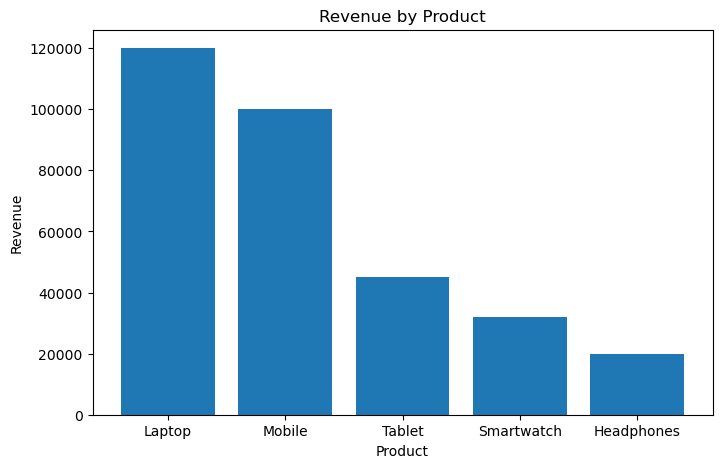

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(8,5))
plt.bar(sales_by_product["Product"], sales_by_product["Revenue"])
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.show()
plt.savefig('Revenue_by_product.png')

In [11]:
# FROM THE QUERY 2

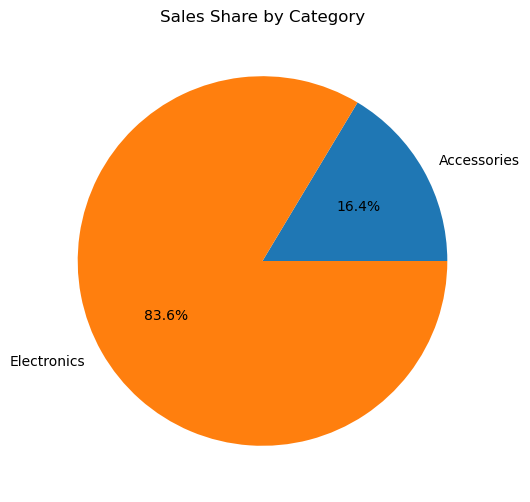

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(6,6))
plt.pie(sales_by_category["Revenue"], labels=sales_by_category["Category"], autopct="%1.1f%%")
plt.title("Sales Share by Category")
plt.show()
plt.savefig('Sales_share_by_catagory.png')

In [13]:
# FROM QUERY 3

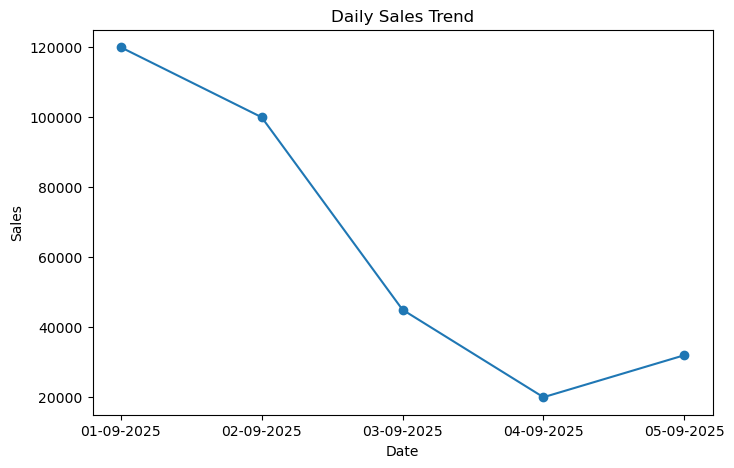

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(8,5))
plt.plot(daily_sales["OrderDate"], daily_sales["Daily_Sales"], marker="o")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales Trend")
plt.show()
plt.savefig('Daily_sales_trend.png')